##**Credit Card Fraud Detection by Machine Learning and Deep Learning**

Beside the main objective to provide a credit card fraud detection solutions by using machine learning and deep learning methods, our aim is to learn as much as possible techniques to detect fraud in credit card payments. 

###**Context**
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.


###**Dataset and Content**
The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

###**1. Introduction and Data Preperation**
In this chapter, we will explore the typical challenges associated with fraud detection, and we will resample our data in a smart way, to tackle problems with imbalanced data.

However, Machine Learning algorithms usually work best when the different classes contained in the dataset are more or less equally present. If there are few cases of fraud, then there's little data to learn how to identify them. This is known as class imbalance, and it's one of the main challenges of fraud detection. Let's explore this dataset, and observe this class imbalance problem.

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/gdrive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import pandas as pd
df=pd.read_csv("/content/gdrive/My Drive/creditcard.csv")

In [ ]:
# Explore the features available in our dataframe
print(df.info())
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Lets check for missing values 
df.isnull().values.any()

False

In [ ]:
# Count the occurrences of fraud and no fraud and print them
occ = df['Class'].value_counts()
print(occ)
print()

0    284315
1       492
Name: Class, dtype: int64



In [ ]:
# Print the ratio of fraud cases
print(occ / df.shape[0])

0    0.998273
1    0.001727
Name: Class, dtype: float64


As we can see, the ratio of fraudulent transactions is very low(0.001727). This is a case of class imbalance problem.

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Print the shape of the data
data = df.sample(frac=0.1, random_state = 1)
print(data.shape)
print(data.describe())

(28481, 31)
                Time            V1  ...        Amount         Class
count   28481.000000  28481.000000  ...  28481.000000  28481.000000
mean    94705.035216     -0.001143  ...     89.957884      0.001720
std     47584.727034      1.994661  ...    270.894630      0.041443
min         0.000000    -40.470142  ...      0.000000      0.000000
25%     53924.000000     -0.908809  ...      5.980000      0.000000
50%     84551.000000      0.031139  ...     22.350000      0.000000
75%    139392.000000      1.320048  ...     78.930000      0.000000
max    172784.000000      2.411499  ...  19656.530000      1.000000

[8 rows x 31 columns]


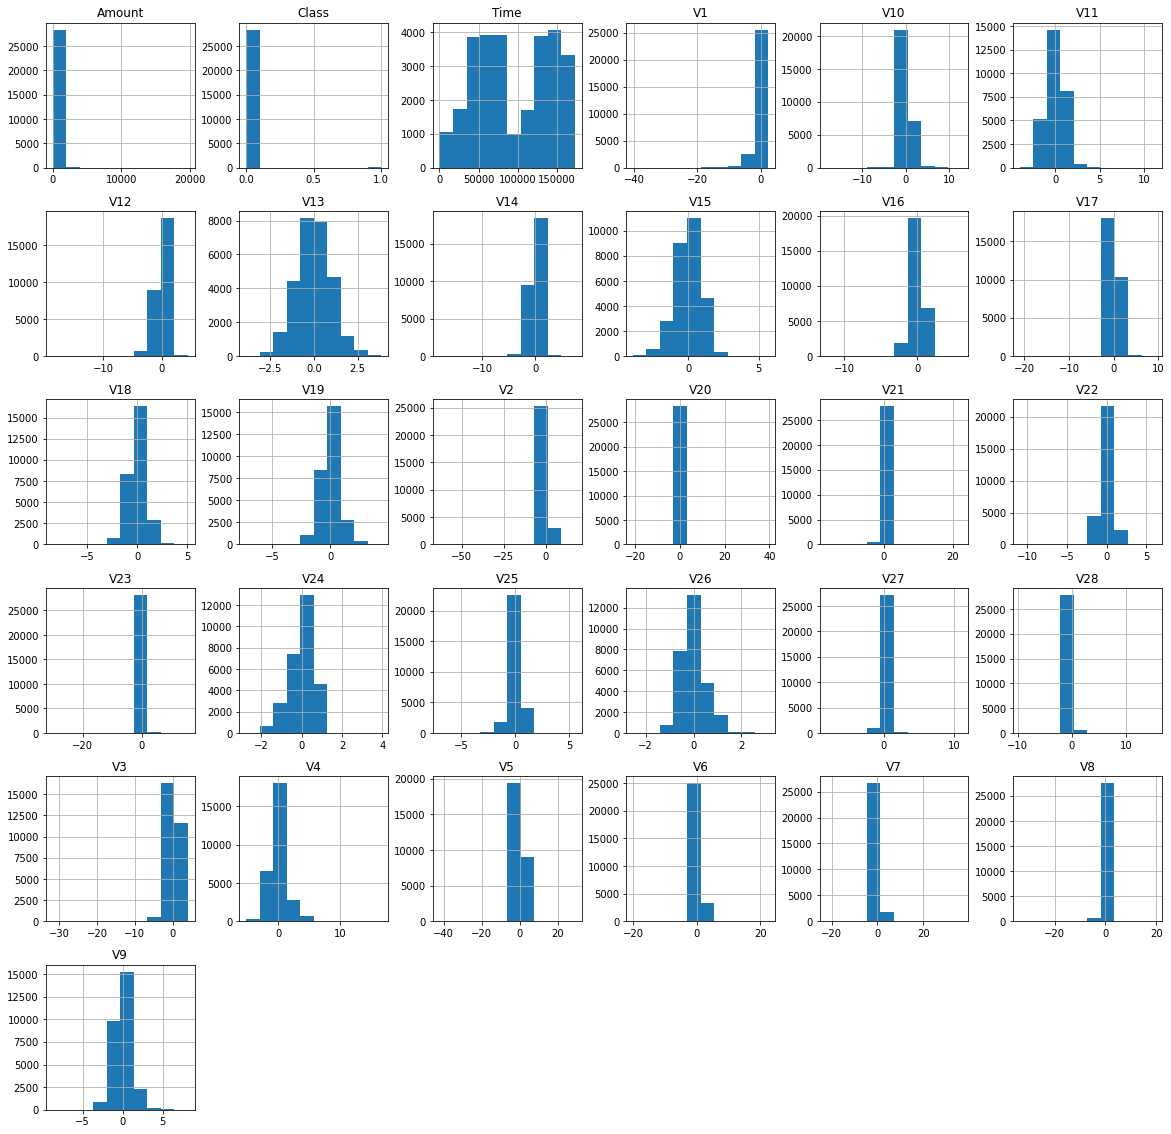

In [ ]:
# Plot histograms of each parameter 
data.hist(figsize = (20, 20))
data.plot

In [ ]:
# Determine number of fraud cases in dataset
Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0017234102419808666
Fraud Cases: 49
Valid Transactions: 28432


###**1.1 Plotting Fraud to non Fraud Ratio**

we'll look at the data and visualize the fraud to non-fraud ratio. It is always a good starting point in fraud analysis, to look at our data first, before we make any changes to it.
Moreover, when talking to our colleagues, a picture often makes it very clear that we're dealing with heavily imbalanced data. Let's create a plot to visualize the ratio fraud to non-fraud data points on the dataset df.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def prep_data(df):
    X = df.iloc[:, 2:29]
    X = np.array(X).astype(np.float)
    y = df.iloc[:, 30]
    y=np.array(y).astype(np.float)
    return X, y

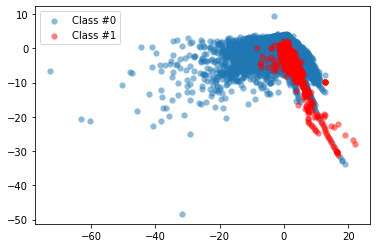

In [ ]:
# Define a function to create a scatter plot of our data and labels
def plot_data(X, y):
	plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
	plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
	plt.legend()
	return plt.show()

# Create X and y from the prep_data function 
X, y = prep_data(df)

# Plot our data by running our plot data function on X and y
plot_data(X, y)

By visualizing the data we can immediately see how our fraud cases are scattered over our data, and how few are cases we have. A picture often makes the imbalance problem often very clear.

In [ ]:
df.iloc[0].values 

array([ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02,  2.53634674e+00,
        1.37815522e+00, -3.38320770e-01,  4.62387778e-01,  2.39598554e-01,
        9.86979013e-02,  3.63786970e-01,  9.07941720e-02, -5.51599533e-01,
       -6.17800856e-01, -9.91389847e-01, -3.11169354e-01,  1.46817697e+00,
       -4.70400525e-01,  2.07971242e-01,  2.57905802e-02,  4.03992960e-01,
        2.51412098e-01, -1.83067779e-02,  2.77837576e-01, -1.10473910e-01,
        6.69280749e-02,  1.28539358e-01, -1.89114844e-01,  1.33558377e-01,
       -2.10530535e-02,  1.49620000e+02,  0.00000000e+00])

In [ ]:
X[0]

array([-0.07278117,  2.53634674,  1.37815522, -0.33832077,  0.46238778,
        0.23959855,  0.0986979 ,  0.36378697,  0.09079417, -0.55159953,
       -0.61780086, -0.99138985, -0.31116935,  1.46817697, -0.47040053,
        0.20797124,  0.02579058,  0.40399296,  0.2514121 , -0.01830678,
        0.27783758, -0.11047391,  0.06692807,  0.12853936, -0.18911484,
        0.13355838, -0.02105305])

In [ ]:
X.shape

(284807, 27)

In [ ]:
y

array([0., 0., 0., ..., 0., 0., 0.])

###2.1 **Resampling methods for imbalanced data**

**Applying SMOTE (Synthetic Minority Over-sampling Technique)**

we are going to re-balance our data using the Synthetic Minority Over-sampling Technique (SMOTE). Unlike ROS(Random Over Sampler), SMOTE does not create exact copies of observations, but creates new, synthetic, samples that are quite similar to the existing observations in the minority class. 
SMOTE is therefore slightly more sophisticated than just copying observations, so let's apply SMOTE to our credit card data. The dataset df is available and the packages you need for SMOTE are imported. In the following exercise, you'll visualize the result and compare it to the original data, such that you can see the effect of applying SMOTE very clearly.

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


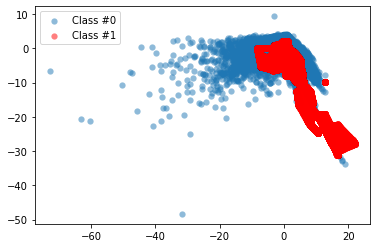

In [ ]:
from imblearn.over_sampling import SMOTE 

# Run the prep_data function
X, y = prep_data(df)

# Define the resampling method
method = SMOTE()

# Create the resampled feature set
X_resampled, y_resampled = method.fit_sample(X, y)

# Plot the resampled data
plot_data(X_resampled, y_resampled)

As you can see, our minority class is now much more prominently visible in our data.

###**2.2 Compare SMOTE to original data**

We saw that using SMOTE suddenly gives us more observations of the minority class. Let's compare those results to our original data, to get a good feeling for what has actually happened. Let's have a look at the value counts again of our old and new data, and let's plot the two scatter plots of the data side by side. 

In [ ]:
def compare_plot(X,y,X_resampled,y_resampled, method):
    # Start a plot figure
    f, (ax1, ax2) = plt.subplots(1, 2)
    
    # sub-plot number 1, this is our normal data
    c0 = ax1.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0",alpha=0.5)
    c1 = ax1.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1",alpha=0.5, c='r')
    ax1.set_title('Original set')
    
    # sub-plot number 2, this is our oversampled data
    ax2.scatter(X_resampled[y_resampled == 0, 0], X_resampled[y_resampled == 0, 1], label="Class #0", alpha=.5)
    ax2.scatter(X_resampled[y_resampled == 1, 0], X_resampled[y_resampled == 1, 1], label="Class #1", alpha=.5,c='r')
    ax2.set_title(method)
    
    # some settings and ready to go
    plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
                  ncol=2, labelspacing=0.)
    plt.tight_layout(pad=3)
    return plt.show()

0.0    284315
1.0       492
dtype: int64
1.0    284315
0.0    284315
dtype: int64


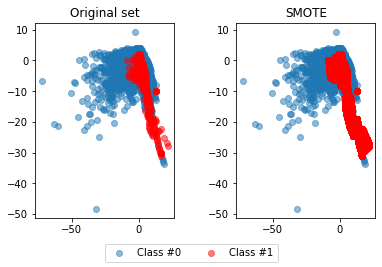

In [ ]:
# Print the value_counts on the original labels y
print(pd.value_counts(pd.Series(y)))

# Print the value_counts
print(pd.value_counts(pd.Series(y_resampled)))

# Run compare_plot
compare_plot(X, y, X_resampled, y_resampled, method='SMOTE')

It should by now be clear that our SMOTE has balanced our data completely, and that the minority class is now equal in size to the majority class. Visualizing the data shows the effect on your data very clearly

###**2.3 Traditional way to catch fraud**

Now we are going to try finding fraud cases in our credit card dataset the "old way". First we'll define threshold values using common statistics, to split fraud and non-fraud. Then, use those thresholds on our features to detect fraud. This is common practice within fraud analytics teams.

Statistical thresholds are often determined by looking at the mean values of observations. Let's start this exercise by checking whether feature means differ between fraud and non-fraud cases. Finally, you'll check how well this performs in fraud detection.

In [ ]:
# Get the mean for each group
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
# Implement a rule for stating which cases are flagged as fraud
df['flag_as_fraud'] = np.where(np.logical_and(df['V1'] < -3, df['V3'] < -5), 1, 0)

# Create a crosstab of flagged fraud cases versus the actual fraud cases
pd.crosstab(df.Class, df.flag_as_fraud, rownames=['Actual Fraud'], colnames=['Flagged Fraud'])

Flagged Fraud,0,1
Actual Fraud,,
0,283089,1226
1,322,170


not bad, with this rule, we detect 170 out of 492 fraud cases, but can't detect the other 322, and get 1226 false positives.

### **3. Using ML classifications to catch fraud**

In this section we will discuss the logistic regression technique with applying different hyper parameter tuning methods to find best results.

###**3.1 Logistic Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Fit a logistic regression model to our data
model = LogisticRegression()
model.fit(X_train, y_train)

# Obtain model predictions
predicted = model.predict(X_test)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.89      0.63      0.74       147

    accuracy                           1.00     85443
   macro avg       0.95      0.81      0.87     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85285    11]
 [   55    92]]


We are getting much less false positives, so that's an improvement. Also, we're catching a higher percentage of fraud cases, so that is also better than before. we are using only our test data to calculate the model results on. We're comparing the crosstab on the full dataset from the last exercise, with a confusion matrix of only 30% of the total dataset, so that's where that difference comes from

### **3.2 Logistic regression combined with SMOTE and using pipeline**

We're going to take the Logistic Regression model from the previous, and combine that with a SMOTE resampling method. We'll show you how to do that efficiently by using a pipeline that combines the resampling method with the model in one go. First, we need to define the pipeline that we're going to use.

In [ ]:
# This is the pipeline module we need for this from imblearn
from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import BorderlineSMOTE

# Define which resampling method and which ML model to use in the pipeline
resampling = BorderlineSMOTE(kind='borderline-2') # instead SMOTE(kind='borderline2') ###################################
model = LogisticRegression()

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

Now we have our pipeline defined, and combining a logistic regression with a SMOTE method, let's run it on the data. we can treat the pipeline as if it were a single machine learning model. 

In [ ]:
# Split your data X and y, into a training and a test set and fit the pipeline onto the training data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=0)

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
predicted = pipeline.predict(X_test)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Classifcation report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     85296
         1.0       0.06      0.88      0.12       147

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Confusion matrix:
 [[83365  1931]
 [   17   130]]


As we can see, the SMOTE slightly improves our results. We now manage to find all cases of fraud, but we have a slightly higher number of false positives. Remember, not in all cases does resampling necessarily lead to better results. When the fraud cases are very spread and scattered over the data, using SMOTE can introduce a bit of bias. Nearest neighbors aren't necessarily also fraud cases, so the synthetic samples might 'confuse' the model slightly.

### **3.3 Random Forest Classifier**

In [ ]:
# Import the random forest model from sklearn
from sklearn.ensemble import RandomForestClassifier

# Split your data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Define the model as the random forest
model = RandomForestClassifier(random_state=5)

In [ ]:
X_test.shape, y_test.shape

((85443, 27), (85443,))

In [ ]:
# Fit the model to our training set
model.fit(X_train, y_train)

# Obtain predictions from the test data 
predicted = model.predict(X_test)

from sklearn.metrics import accuracy_score

# Print the accuracy performance metric
print(accuracy_score(y_test, predicted))

0.9995201479348805


###**3.4 Performance metrics for the RF model**

With highly imbalanced fraud data, the AUROC curve is a more reliable performance metric, used to compare different classifiers. Moreover, the classification report tells you about the precision and recall of your model, whilst the confusion matrix actually shows how many fraud cases you can predict correctly

In [ ]:
# Import the packages to get the different performance metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Obtain the predictions from our random forest model 
predicted = model.predict(X_test)

# Predict probabilities
probs = model.predict_proba(X_test)

# Print the AUCROC curve, classification report and confusion matrix
print(classification_report(y_test, predicted))

print(confusion_matrix(y_test, predicted, labels=[0, 1]))

print("AUC ROC score: ", roc_auc_score(y_test, probs[:,1]))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.95      0.76      0.85       147

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

[[85290     6]
 [   35   112]]
AUC ROC score:  0.9338071375614587


We have now obtained more meaningful performance metrics that tell us how well the model performs, given the highly imbalanced data that we're working with. The model predicts 118 cases of fraud, out of which 112 are actual fraud. You have only 6 false positives. This is really good, and as a result you have a very high precision score. You do however, don't catch 35 cases of actual fraud (false negative). We consider the scores based on fraud detection (1).

In [ ]:
probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

###**3.5 Plotting the Precision Recall Curve**

In this curve Precision and Recall are inversely related; as Precision increases, Recall falls and vice-versa.

In [ ]:
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

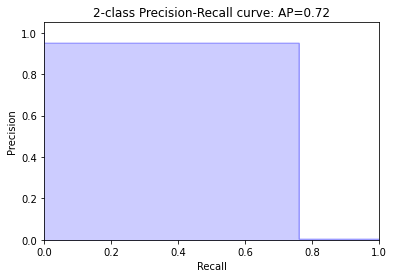

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve, roc_curve

# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)

# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(y_test, predicted)

# Plot the recall precision tradeoff
plot_pr_curve(recall, precision, average_precision)

The ROC curve plots the true positives vs. false positives , for a classifier, as its discrimination threshold is varied. Since, a random method describes a horizontal curve through the unit interval, it has an AUC of 0.5. Minimally, classifiers should perform better than this, and the extent to which they score higher than one another (meaning the area under the ROC curve is larger), they have better expected performance.

In [ ]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, predicted)

false_positive_rate

array([0.00000000e+00, 7.03432752e-05, 1.00000000e+00])

In [ ]:
true_positive_rate

array([0.        , 0.76190476, 1.        ])

In [ ]:
threshold

array([2., 1., 0.])

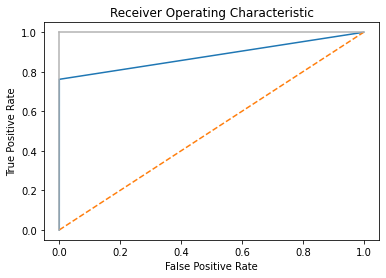

In [ ]:
# Plot ROC curve
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()


*   **AUC ROC** : Area under the ROC (Receiver Operating Characteristic) curve is a performance measurement for classification problem at various thresholds settings. 

*   **ROC** is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. 

*   **Higher** the AUC, **better** the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between transaction with fraud and no fraud.





###**3.6 Model adjustments**

In [ ]:
# Define the model with balanced subsample
model = RandomForestClassifier(class_weight='balanced_subsample', n_estimators=100, random_state=5)

# Fit your training model to your training set
model.fit(X_train, y_train)

# Obtain the predicted values and probabilities from the model 
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

# Print the roc_auc_score, the classification report and confusion matrix
print(roc_auc_score(y_test, probs[:,1]))
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))

0.9373615465694811
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.97      0.75      0.85       147

    accuracy                           1.00     85443
   macro avg       0.99      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443

[[85293     3]
 [   37   110]]


We can see that the model results don't improve drastically. If we mostly care about catching fraud, and not so much about the false positives, this does actually not improve our model at all.

###**3.7 Adjusting your Random Forest to fraud detection**

In [ ]:
def get_model_results(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    print (classification_report(y_test, predicted))
    print (confusion_matrix(y_test, predicted))

In [ ]:
# Change the model options
model = RandomForestClassifier(bootstrap=True, 
                               class_weight={0:1, 1:12}, # 0: non-fraud , 1:fraud 
                               criterion='entropy',
                               
                               # Change depth of model
                               max_depth=10,
                               
                               # Change the number of samples in leaf nodes
                               min_samples_leaf=10, 
                               
                               # Change the number of trees to use
                               n_estimators=20, 
                               
                               n_jobs=-1, random_state=5)

# Run the function get_model_results
get_model_results(X_train, y_train, X_test, y_test, model)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.86      0.80      0.83       147

    accuracy                           1.00     85443
   macro avg       0.93      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443

[[85277    19]
 [   30   117]]


You can see by smartly defining more options in the model, you can obtain better predictions. You have effectively reduced the number of false negatives, i.e. you are catching more cases of fraud, whilst keeping the number of false positives low. In this exercise we've manually changed the options of the model

###**3.8 GridSearchCV to find optimal parameters**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the parameter sets to test
param_grid = {
    'n_estimators': [1, 30], 
    'max_features': ['auto', 'log2'],  
    'max_depth': [4, 8], 
    'criterion': ['gini', 'entropy']
}

# Define the model to use
model = RandomForestClassifier(random_state=5) 

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1) 

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)
CV_model.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 30}

###**3.9 Model results using GridSearchCV**

In [ ]:
# Input the optimal parameters in the model
model = RandomForestClassifier(class_weight={0:1,1:12}, 
                               criterion='gini',
                               n_estimators=30, 
                               max_features='log2',  
                               min_samples_leaf=10, 
                               max_depth=8,
                               n_jobs=-1, random_state=5)

# Get results from your model
get_model_results(X_train, y_train, X_test, y_test, model)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.83      0.80      0.82       147

    accuracy                           1.00     85443
   macro avg       0.92      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443

[[85272    24]
 [   29   118]]


we've managed to improve our model even further. The number of false positives has now been slightly reduced even further, which means we are catching more cases of fraud. However, we see that the number of false negatives is still the same. That is that Precision-Recall trade-off in action. To decide which final model is best, you need to take into account how bad it is not to catch fraudsters, versus how many false positives the fraud analytics team can deal with.

###**3.10 Annomaly Detection technique**

Now that we have processed our data, we can begin deploying our machine learning algorithms. We will use the following techniques:

**Local Outlier Factor (LOF)**

The anomaly score of each sample is called Local Outlier Factor. It measures the local deviation of density of a given sample with respect to its neighbors. It is local in that the anomaly score depends on how isolated the object is with respect to the surrounding neighborhood.

**Isolation Forest Algorithm**

The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node.

This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.

Random partitioning produces noticeably shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

In [ ]:
# Get all the columns from the dataFrame
columns = data.columns.tolist()

# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]

# Store the variable we'll be predicting on
target = "Class"

X = data[columns]
Y = data[target]

# Print shapes
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
# define random states
state = 1
# define outlier detection tools to be compared
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=outlier_fraction,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction)}

In [ ]:
# Fit the model
plt.figure(figsize=(9, 7))
n_outliers = len(Fraud)
for i, (clf_name, clf) in enumerate(classifiers.items()):
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
  
    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

Isolation Forest: 71
0.99750711000316
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.28      0.29      0.28        49

    accuracy                           1.00     28481
   macro avg       0.64      0.64      0.64     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 97
0.9965942207085425
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481



<Figure size 648x504 with 0 Axes>

### **4.1 Using Keras to handle Imbalanced Classification Problem**

In [ ]:
import csv
import numpy as np

# Get the real data from https://www.kaggle.com/mlg-ulb/creditcardfraud/
fname = "/content/gdrive/My Drive/creditcard.csv"

all_features = []
all_targets = []
with open(fname) as f:
    for i, line in enumerate(f):
        if i == 0:
            print("HEADER:", line.strip())
            continue  # Skip header
        fields = line.strip().split(",")
        all_features.append([float(v.replace('"', "")) for v in fields[:-1]])
        all_targets.append([int(fields[-1].replace('"', ""))])
        if i == 1:
            print("EXAMPLE FEATURES:", all_features[-1])

features = np.array(all_features, dtype="float32")
targets = np.array(all_targets, dtype="uint8")
print("features.shape:", features.shape)
print("targets.shape:", targets.shape)


HEADER: "Time","V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","Amount","Class"
EXAMPLE FEATURES: [0.0, -1.3598071336738, -0.0727811733098497, 2.53634673796914, 1.37815522427443, -0.338320769942518, 0.462387777762292, 0.239598554061257, 0.0986979012610507, 0.363786969611213, 0.0907941719789316, -0.551599533260813, -0.617800855762348, -0.991389847235408, -0.311169353699879, 1.46817697209427, -0.470400525259478, 0.207971241929242, 0.0257905801985591, 0.403992960255733, 0.251412098239705, -0.018306777944153, 0.277837575558899, -0.110473910188767, 0.0669280749146731, 0.128539358273528, -0.189114843888824, 0.133558376740387, -0.0210530534538215, 149.62]
features.shape: (284807, 30)
targets.shape: (284807, 1)


###**4.2 Preperation of a Validation Set**

In [ ]:
num_val_samples = int(len(features) * 0.2)
train_features = features[:-num_val_samples]
train_targets = targets[:-num_val_samples]
val_features = features[-num_val_samples:]
val_targets = targets[-num_val_samples:]

print("Number of training samples:", len(train_features))
print("Number of validation samples:", len(val_features))

Number of training samples: 227846
Number of validation samples: 56961


###**4.3 Analyze class imbalance in the targets**


In [ ]:
counts = np.bincount(train_targets[:, 0])
print(
    "Number of positive samples in training data: {} ({:.2f}% of total)".format(
        counts[1], 100 * float(counts[1]) / len(train_targets)
    )
)

weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]


Number of positive samples in training data: 417 (0.18% of total)


###**4.4 Normalize the data using training set statistics**

In [ ]:
mean = np.mean(train_features, axis=0)
train_features -= mean
val_features -= mean
std = np.std(train_features, axis=0)
train_features /= std
val_features /= std

###**4.5 Build a binary classification model**

In [ ]:
from tensorflow import keras

model = keras.Sequential(
    [
        keras.layers.Dense(
            256, activation="relu", input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               7936      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 139,777
Trainable params: 139,777
Non-trainable params: 0
__________________________________________________

###**4.6 Train the model with class_weight argument**

In [ ]:
metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
]

model.compile(
    optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=metrics
)

callbacks = [keras.callbacks.ModelCheckpoint("fraud_model_at_epoch_{epoch}.h5")]
class_weight = {0: weight_for_0, 1: weight_for_1}

model.fit(
    train_features,
    train_targets,
    batch_size=2048,
    epochs=50,
    verbose=2,
    callbacks=callbacks,
    validation_data=(val_features, val_targets),
    class_weight=class_weight,
)


Epoch 1/50
112/112 - 6s - loss: 2.3339e-06 - fn: 39.0000 - fp: 28461.0000 - tn: 198968.0000 - tp: 378.0000 - precision: 0.0131 - recall: 0.9065 - val_loss: 0.0894 - val_fn: 10.0000 - val_fp: 907.0000 - val_tn: 55979.0000 - val_tp: 65.0000 - val_precision: 0.0669 - val_recall: 0.8667
Epoch 2/50
112/112 - 5s - loss: 1.4917e-06 - fn: 34.0000 - fp: 7437.0000 - tn: 219992.0000 - tp: 383.0000 - precision: 0.0490 - recall: 0.9185 - val_loss: 0.0689 - val_fn: 10.0000 - val_fp: 795.0000 - val_tn: 56091.0000 - val_tp: 65.0000 - val_precision: 0.0756 - val_recall: 0.8667
Epoch 3/50
112/112 - 5s - loss: 1.1145e-06 - fn: 25.0000 - fp: 7096.0000 - tn: 220333.0000 - tp: 392.0000 - precision: 0.0524 - recall: 0.9400 - val_loss: 0.0602 - val_fn: 8.0000 - val_fp: 1051.0000 - val_tn: 55835.0000 - val_tp: 67.0000 - val_precision: 0.0599 - val_recall: 0.8933
Epoch 4/50
112/112 - 5s - loss: 1.2066e-06 - fn: 24.0000 - fp: 8319.0000 - tn: 219110.0000 - tp: 393.0000 - precision: 0.0451 - recall: 0.9424 - val_l

At the end of training, out of 56255 validation transactions, we are:

- Correctly identifying 66 of them as fraudulent
- Missing 09 fraudulent transactions
- At the cost of incorrectly flagging 631 legitimate transactions

In the real world, one would put an even higher weight on class 1,
so as to reflect that False Negatives are more costly than False Positives.


###**4.7 Adjusting baseline model**



In [ ]:
#Logistic regression using keras: 
from tensorflow import keras
model = keras.Sequential()
#First layer
model.add(keras.layers.Dense(128, activation= 'relu', input_shape= (train_features.shape[1],)))
model.add(keras.layers.BatchNormalization(axis=1)) #Batch normalization by each row after activation function to reduce outliers. 
model.add(keras.layers.Dropout(0.2))
#Second layer: 
model.add(keras.layers.Dense(256, activation= 'relu'))
model.add(keras.layers.BatchNormalization(axis= 1))
model.add(keras.layers.Dropout(0.2))
#Third layer
model.add(keras.layers.Dense(256, activation= 'relu'))
model.add(keras.layers.BatchNormalization(axis= 1))
model.add(keras.layers.Dropout(0.2))
#Fourth layer
model.add(keras.layers.Dense(256, activation= 'relu'))
model.add(keras.layers.BatchNormalization(axis= 1))
model.add(keras.layers.Dropout(0.2))
#Last layer
model.add(keras.layers.Dense(1,activation= 'sigmoid'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               3968      
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               33024     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)              

In [ ]:
#Loss function and backpropagation: 
#Adam optimizer: 
opt= keras.optimizers.Adam(learning_rate= 0.5, epsilon= 1e-05) #learning-rate is constant, need to be tuned

#Metrics to determine performance of the model: 
metrics= [
          keras.metrics.AUC(curve= 'ROC', name = 'AUC'), #measure the complementary between FalsePositive and TrueNegative
          keras.metrics.FalseNegatives(name="fn"),
          keras.metrics.FalsePositives(name="fp"),
          keras.metrics.TrueNegatives(name="tn"),
          keras.metrics.TruePositives(name="tp")
]

#Loss function: 
model.compile(loss= 'binary_crossentropy', optimizer= opt, metrics= metrics) 


#Save model parameters at each epoch checkpoint: 
model_checkpoint= keras.callbacks.ModelCheckpoint("fraud_model_at_epoch_{epoch}.h5", save_freq= 'epoch')
class_weight= {0: weight_for_0, 1: weight_for_1}
#Fit the model: 
model.fit(train_features,
    train_targets,
    batch_size=2048,
    epochs=50,
    verbose=2,
    callbacks=[model_checkpoint],
    validation_data= (val_features, val_targets),
    class_weight= class_weight)




Epoch 1/50
112/112 - 9s - loss: 2.8914e-06 - AUC: 0.9508 - fn: 36.0000 - fp: 37544.0000 - tn: 189885.0000 - tp: 381.0000 - val_loss: 0.1316 - val_AUC: 0.9762 - val_fn: 10.0000 - val_fp: 1061.0000 - val_tn: 55825.0000 - val_tp: 65.0000
Epoch 2/50
112/112 - 8s - loss: 2.9659e-06 - AUC: 0.9520 - fn: 40.0000 - fp: 17089.0000 - tn: 210340.0000 - tp: 377.0000 - val_loss: 0.4117 - val_AUC: 0.9730 - val_fn: 6.0000 - val_fp: 6784.0000 - val_tn: 50102.0000 - val_tp: 69.0000
Epoch 3/50
112/112 - 8s - loss: 3.1712e-06 - AUC: 0.9644 - fn: 37.0000 - fp: 16544.0000 - tn: 210885.0000 - tp: 380.0000 - val_loss: 0.2575 - val_AUC: 0.9293 - val_fn: 8.0000 - val_fp: 3650.0000 - val_tn: 53236.0000 - val_tp: 67.0000
Epoch 4/50
112/112 - 8s - loss: 4.5833e-06 - AUC: 0.9607 - fn: 37.0000 - fp: 15996.0000 - tn: 211433.0000 - tp: 380.0000 - val_loss: 0.9998 - val_AUC: 0.9678 - val_fn: 3.0000 - val_fp: 5897.0000 - val_tn: 50989.0000 - val_tp: 72.0000
Epoch 5/50
112/112 - 8s - loss: 4.9892e-06 - AUC: 0.9604 - fn: 

In [ ]:
#Support Vector Machine:
#from sklearn import svm
#Fitting C-Class SVM:
#clf= svm.SVC()
#clf.fit(X_train, y_train)
#Running Prediction:
#y_predict= clf.predict(X_test)
#pd.crosstab(y_predict, y_test)

col_0,0.0,1.0
row_0,,
0.0,85293,55
1.0,3,92


###**5. Credit Card Fraud Detection by Autoencoders in Keras — TensorFlow**

In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


###**5.1 Autoencoders**
Autoencoders can seem quite bizarre at first. The job of those models is to predict the input, given that same input. 

More specifically, let’s take a look at Autoencoder Neural Networks. This autoencoder tries to learn to approximate the following identity function:

$$\textstyle f_{W,b}(x) \approx x$$

While trying to do just that might sound trivial at first, it is important to note that we want to learn a compressed representation of the data, thus find structure. This can be done by limiting the number of hidden units in the model. Those kind of autoencoders are called undercomplete.

Here's a visual representation of what an Autoencoder might learn:


**Reconstruction error**

We optimize the parameters of our Autoencoder model in such way that a special kind of error - reconstruction error is minimized. In practice, the traditional squared error is often used:

$$\textstyle L(x,x') = ||\, x - x'||^2$$


**Data Preperation**

First, let's drop the Time column (not going to use it) and use the scikit's StandardScaler on the Amount. The scaler removes the mean and scales the values to unit variance:

In [ ]:
from sklearn.preprocessing import StandardScaler

data = df.drop(['Time'], axis=1)

data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

Training our Autoencoder is gonna be a bit different from what we are used to. Let's say you have a dataset containing a lot of non fraudulent transactions at hand. You want to detect any anomaly on new transactions. We will create this situation by training our model on the normal transactions, only. Reserving the correct class on the test set will give us a way to evaluate the performance of our model. We will reserve 20% of our data for testing:

In [ ]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

X_train = X_train.values
X_test = X_test.values

In [ ]:

X_train.shape

(227451, 30)

###**5.2 Building the model**
Our Autoencoder uses 4 fully connected layers with 14, 7, 7 and 29 neurons respectively. The first two layers are used for our encoder, the last two go for the decoder. Additionally, L1 regularization will be used during training:

In [ ]:
input_dim = X_train.shape[1]
encoding_dim = 14

In [ ]:
input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)


Let's train our model for 100 epochs with a batch size of 32 samples and save the best performing model to a file. The ModelCheckpoint provided by Keras is really handy for such tasks. Additionally, the training progress will be exported in a format that TensorBoard understands.

In [ ]:
nb_epoch = 100
batch_size = 32

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Train on 227451 samples, validate on 56962 samples
Epoch 1/100
227451/227451 [==============================] - 10s 45us/step - loss: 0.7958 - accuracy: 0.5670 - val_loss: 0.7618 - val_accuracy: 0.6410
Epoch 2/100
227451/227451 [==============================] - 10s 44us/step - loss: 0.7218 - accuracy: 0.6435 - val_loss: 0.7536 - val_accuracy: 0.6391
Epoch 3/100
227451/227451 [==============================] - 10s 46us/step - loss: 0.7117 - accuracy: 0.6468 - val_loss: 0.7450 - val_accuracy: 0.6384
Epoch 4/100
227451/227451 [==============================] - 10s 43us/step - loss: 0.7069 - accuracy: 0.6521 - val_loss: 0.7399 - val_accuracy: 0.6522
Epoch 5/100
227451/227451 [==============================] - 10s 44us/step - loss: 0.7043 - accuracy: 0.6545 - val_loss: 0.7398 - val_accuracy: 0.6555
Epoch 6/100
227451/227451 [==============================] - 10s 44us/step - loss: 0.7022 - accuracy: 0.6563 - val_loss: 0.7359 - val_accuracy: 0.6579
Epoch 7/100
227451/227451 [================

In [ ]:
autoencoder = load_model('model.h5')

###**5.3 Evaluation**

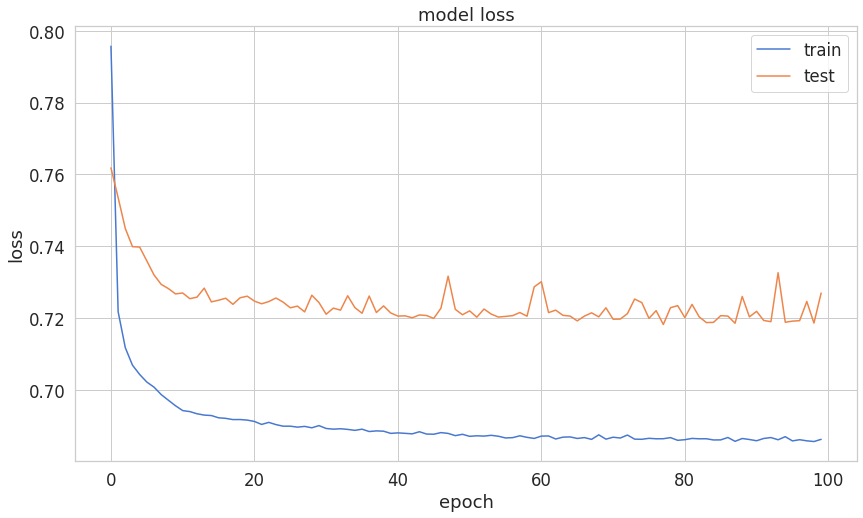

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

The reconstruction error on our training and test data seems to converge nicely. Is it low enough? Let's have a closer look at the error distribution:

In [ ]:
predictions = autoencoder.predict(X_test)

In [ ]:

mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

In [ ]:
error_df.describe()

,reconstruction_error,true_class
count,56962.000000,56962.000000
mean,0.708367,0.001720
std,3.287107,0.041443
min,0.043220,0.000000
25%,0.237795,0.000000
50%,0.385471,0.000000
75%,0.603144,0.000000
max,259.023625,1.000000


###**5.4 Reconstruction error without fraud**

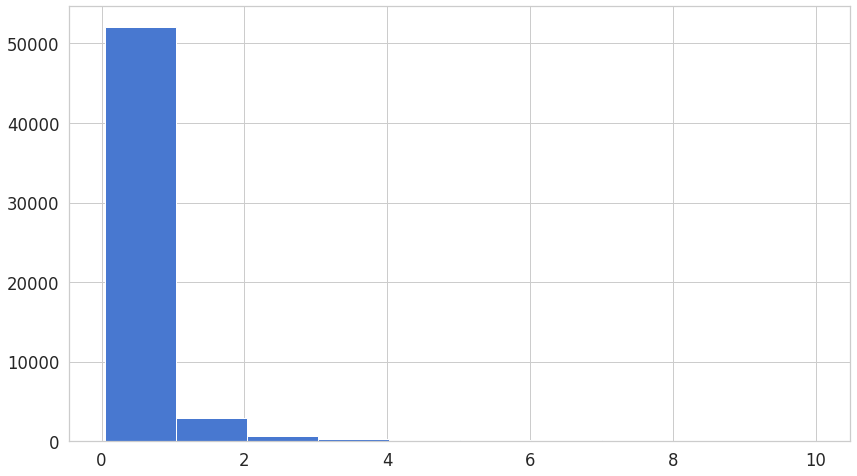

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

###**5.5 Reconstruction error with fraud**

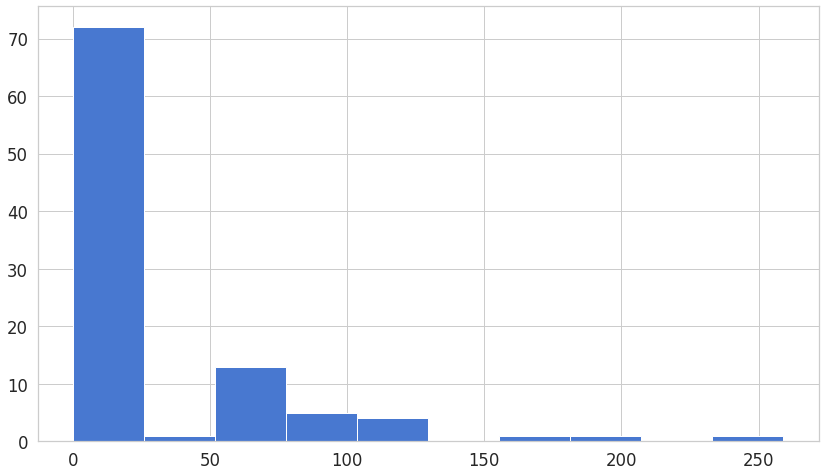

In [ ]:

fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

In [ ]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

ROC curves are very useful tool for understanding the performance of binary classifiers. However, our case is a bit out of the ordinary. We have a very imbalanced dataset. Nonetheless, let's have a look at our ROC curve:

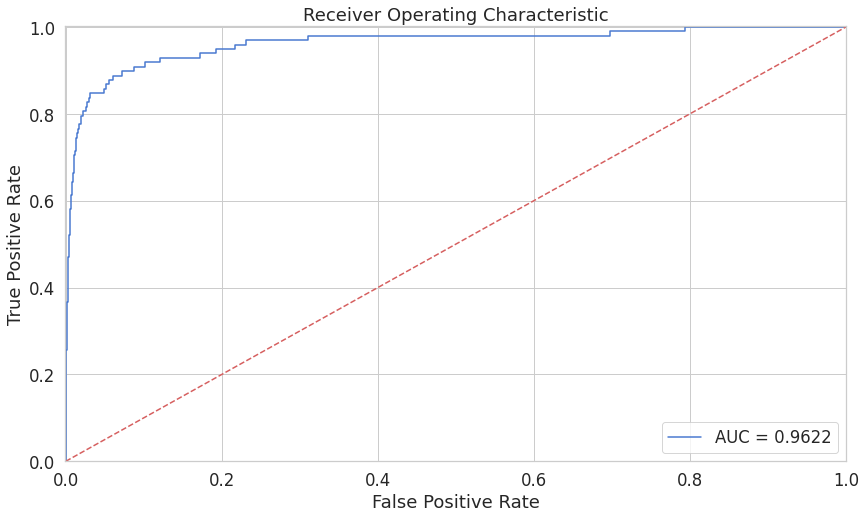

In [ ]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

The ROC curve plots the true positive rate versus the false positive rate, over different threshold values. Basically, we want the blue line to be as close as possible to the upper left corner. While our results look pretty good, we have to keep in mind of the nature of our dataset. ROC doesn't look very useful for us. Onward...

###**5.6 Precision vs Recall**

Precision and recall are defined as follows:

$$\text{Precision} = \frac{\text{true positives}}{\text{true positives} + \text{false positives}}$$$$\text{Recall} = \frac{\text{true positives}}{\text{true positives} + \text{false negatives}}$$
Let's take an example from Information Retrieval in order to better understand what precision and recall are. Precision measures the relevancy of obtained results. Recall, on the other hand, measures how many relevant results are returned. Both values can take values between 0 and 1. You would love to have a system with both values being equal to 1.

Let's return to our example from Information Retrieval. High recall but low precision means many results, most of which has low or no relevancy. When precision is high but recall is low we have the opposite - few returned results with very high relevancy. Ideally, you would want high precision and high recall - many results with that are highly relevant.

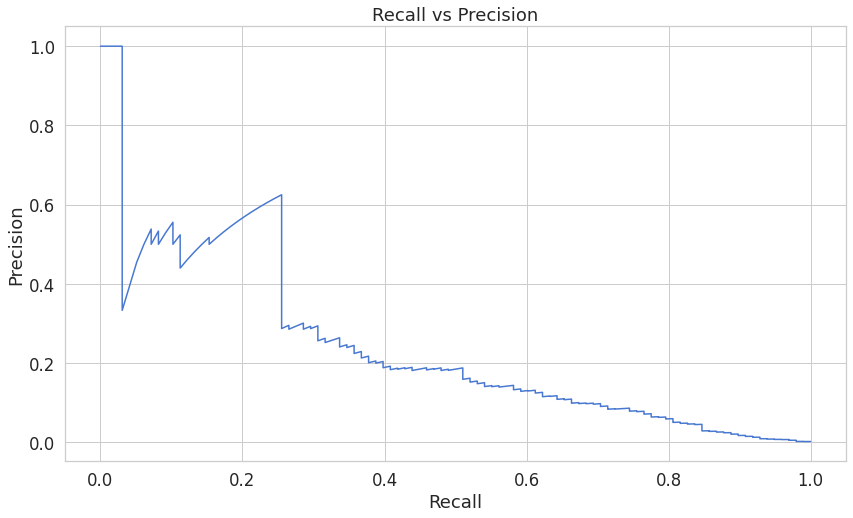

In [ ]:
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).



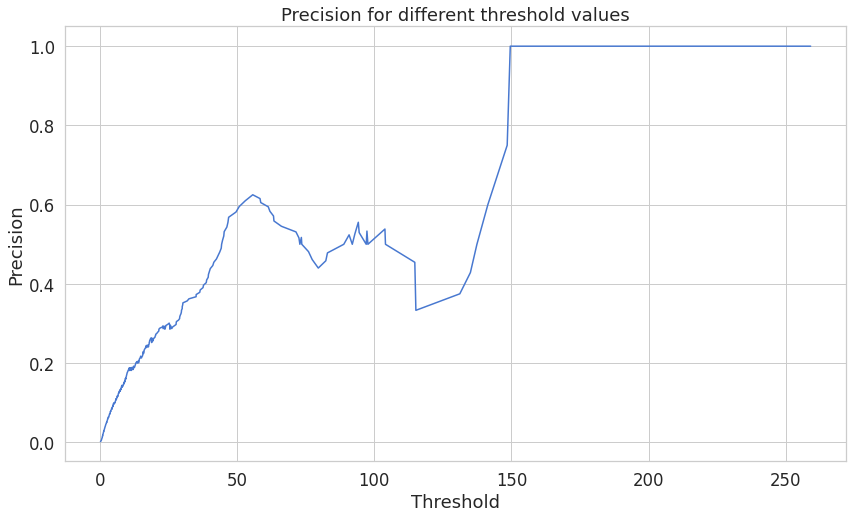

In [ ]:
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

You can see that as the reconstruction error increases our precision rises as well. Let's have a look at the recall:

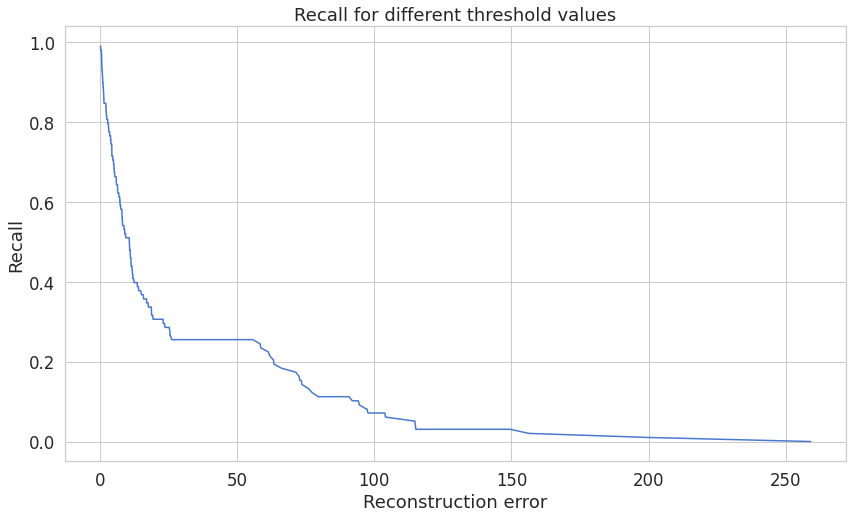

In [ ]:

plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.show()


Here, we have the exact opposite situation. As the reconstruction error increases the recall decreases.

###**5.6 Prediction**

Our model is a bit different this time. It doesn't know how to predict new values. But we don't need that. In order to predict whether or not a new/unseen transaction is normal or fraudulent, we'll calculate the reconstruction error from the transaction data itself. If the error is larger than a predefined threshold, we'll mark it as a fraud (since our model should have a low error on normal transactions). Let's pick that value:

In [ ]:
threshold = 2.9

And see how well we're dividing the two types of transactions:

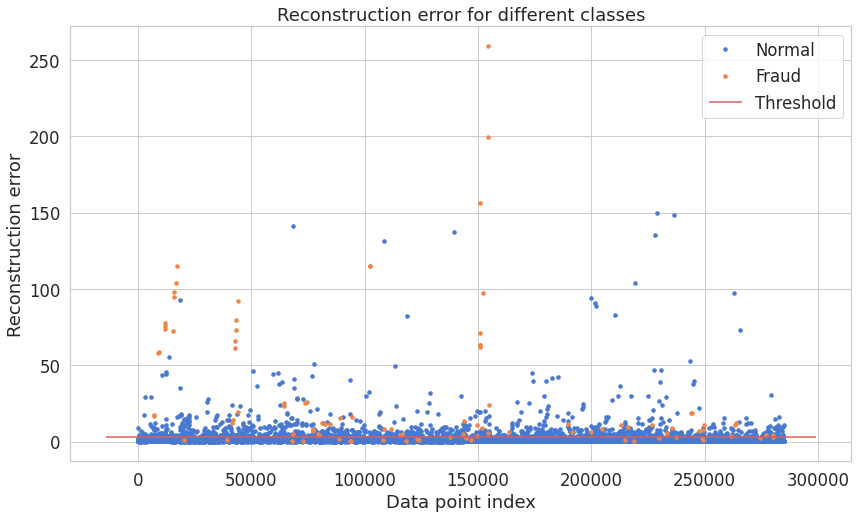

In [ ]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

I know, that chart might be a bit deceiving. Let's have a look at the confusion matrix:

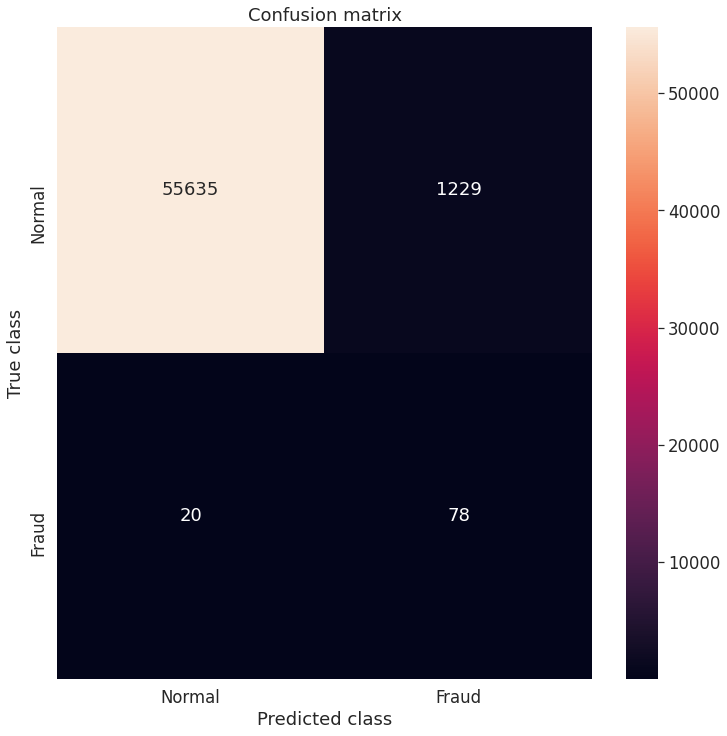

In [ ]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

Our model seems to catch a lot of the fraudulent cases. Of course, there is a catch . The number of normal transactions classified as frauds is really high. Is this really a problem? Probably it is. You might want to increase or decrease the value of the threshold, depending on the problem. That one is up to you.

###**5.7 Conclusion**

We've created a very simple Deep Autoencoder in Keras that can reconstruct what non fraudulent transactions looks like. 

###**5.8 References**

*   [Credit Card Fraud Detection using Machine Learning Algorithms](https://www.researchgate.net/publication/339543849_Credit_Card_Fraud_Detection_using_Machine_Learning_Algorithms)

*   [Fraud Detection using Machine Learning and Deep Learning](https://www.researchgate.net/publication/339411416_Fraud_Detection_using_Machine_Learning_and_Deep_Learning)

*   [Precision and Recall](https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c)
*   [Confusion matrix terminology](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/#:~:text=A%20confusion%20matrix%20is%20a,related%20terminology%20can%20be%20confusing.)
*   [Understanding AUC - ROC Curve](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)

*   [Building Autoencoders in Keras](https://blog.keras.io/building-autoencoders-in-keras.html)
*   [Stanford tutorial on Autoencoders](http://ufldl.stanford.edu/tutorial/unsupervised/Autoencoders/)
*   [Stacked Autoencoders in TensorFlow](http://cmgreen.io/2016/01/04/tensorflow_deep_autoencoder.html)
